# LBYCPF3 Project - Neural Network Portion

### by Francis John N Magallanes

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Preprocessing of the Data

In [2]:
raw_data = pd.read_csv("iris_improved.csv")

#INPUT PART
#this will select all columns up until petal width column
input_df = raw_data.loc[:, :"petal width"] 

#this will convert the dataframe into numpy array
input_np = input_df.to_numpy()

#OUTPUT PART
#this will select the class column
output_df = raw_data.loc[:, "class":]

#this will create three columns for the different possible output of the neural network
# 1 0 0  is for the Iris-setosa
# 0 1 0 is for the Iris-versicolor
# 0 0 1 is for the Iris-virginica
output_df["first-neuron"] = np.where(output_df["class"] == "Iris-setosa" ,1, 0)
output_df["second-neuron"] = np.where(output_df["class"] == "Iris-versicolor" ,1, 0)
output_df["third-neuron"] = np.where(output_df["class"] == "Iris-virginica" ,1, 0)

#this will convert the dataframe into numpy array
output_np = output_df.loc[:, "first-neuron":].to_numpy()


<ipython-input-2-730daf96842e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df["first-neuron"] = np.where(output_df["class"] == "Iris-setosa" ,1, 0)
<ipython-input-2-730daf96842e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df["second-neuron"] = np.where(output_df["class"] == "Iris-versicolor" ,1, 0)
<ipython-input-2-730daf96842e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [11]:
#Splitting of the train data and test data
x_train, x_test, y_train, y_test = train_test_split(input_np, output_np, test_size= 0.3)

### Building of the Neural Network

In [ ]:
#this will create a simple multi perceptron model
nn_model = Sequential()
nn_model.add( Dense(4 , activation = "relu" ) ) #first hidden layer with 4 neurons
nn_model.add( Dense(3 , activation = "relu" ) ) # second hidden layer with 3 neurons
nn_model.add( Dense(3 , activation = "softmax" )) # output layer with 3 neurons


In [ ]:
#building model
nn_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['accuracy', 'Precision'])

### Training the model

In [ ]:
history = nn_model.fit(x_train,y_train, epochs = 2000, validation_split = 0.2)

In [ ]:
#plot of the loss and the accuracy during the training
#for the loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

# Accuracy Curves
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'m')

#setting the legend
plt.legend(['Training loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy'],fontsize=18)

#setting the title and axis labels
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Accuracy or Loss',fontsize=14)
plt.title('Accuracy and Loss Curves',fontsize=18)


### Saving and Loading of the Model

In [ ]:
#for the saving of the model
nn_model.save("nn_model_save")

In [3]:
#for the loading of the saved model
nn_model = load_model("nn_model_save")

### Evaluation of the Model

In [12]:
# the dataset for evaluation will be from the test data 
results = nn_model.evaluate(x_test,y_test)

print("MSE: {}".format(results[0]))
print("Acurracy {}%".format(results[1] * 100))

2/2 [==============================] - 0s 5ms/step - loss: 4.7634e-04 - accuracy: 1.0000 - precision: 1.0000
MSE: 0.00047634189832024276
Acurracy 100.0%


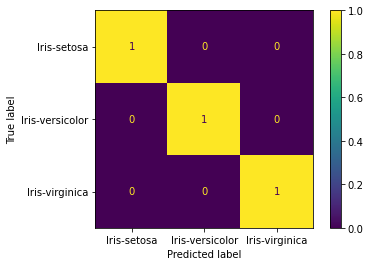

In [8]:
#this will plot the confusion matrix
y_pred_cm = np.argmax( nn_model.predict(x_test) , axis = 1) #y-pred into classes (0,1,2)
y_test_cm = np.argmax(y_test, axis=1) #y-test into classes (0,1,2)
cm = confusion_matrix(y_test_cm, y_pred_cm, normalize= 'true') # generate confusion matrix

#display the generated confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
            display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] )
disp.plot()

### Prediction from the model

In [4]:
x_pred = np.array([[6.3, 3.3, 6.0,2.5]])
print(x_pred)
y_pred = nn_model.predict(x_pred)

true_model_pred = np.argmax(y_pred)

if true_model_pred == 0:
    print('Iris-setosa')
elif true_model_pred == 1:
    print('Iris-versicolor')
else:
    print("Iris-virginica")

[[6.3 3.3 6.  2.5]]
Iris-virginica
